In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [50]:
# using pandas is much easier!!!
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [51]:
def read_csv(datapath,if_test):
    data_y = []
    # index2: Pclass 4:Sex 5:Age 6:SibSp 7:Parch 9: Fare
    data_class = []
    data_sex = []
    data_age = []
    data_sibsp =[]
    data_parch = []
    data_fare = []


    with open(datapath, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        # skip the first line
        firstline = True
        for row in spamreader:
            if firstline:
                firstline = False
                continue
            else:
                #print(', '.join(row))
                if if_test == False:
                    data_y.append(int(row[1]))
                else:
                    data_y.append(0)
                data_class.append(int(row[2-if_test]) if row[2-if_test] != '' else -1)
                data_sex.append(1 if row[4-if_test] == 'female' else 0 if row[4-if_test] == 'male' else 0.5)
                data_age.append(float(row[5-if_test]) if row[5-if_test] != '' else -1)
                data_sibsp.append(int(row[6-if_test]) if row[6-if_test] != '' else -1)
                data_parch.append(int(row[7-if_test]) if row[7-if_test] != '' else -1)
                data_fare.append(float(row[9-if_test]) if row[9-if_test] != '' else -1)
            
    


    #data_x = np.vstack((np.array(data_class),np.array(data_sex),np.array(data_age),
    #                         np.array(data_sibsp),np.array(data_parch),np.array(data_fare)))
    
    data_x = np.vstack((np.array(data_class),np.array(data_sex),np.array(data_age)))


    print("input data dimension (features,data number):",data_x.shape)
    data_y = np.array(data_y).reshape(1,-1)
    # (1,891)
    print(data_y.shape)
    return data_x,data_y
    

In [52]:
train_datapath = '/kaggle/input/titanic/train.csv'
train_data_x,train_data_y = read_csv(train_datapath,if_test=False)
test_datapath = '/kaggle/input/titanic/test.csv'
test_data_x,test_data_y = read_csv(test_datapath,if_test=True)

input data dimension (features,data number): (3, 891)
(1, 891)
input data dimension (features,data number): (3, 418)
(1, 418)


In [53]:
data_x = np.hstack((train_data_x,test_data_x))

In [54]:
"""
# process the age data, sibsp, parch, fare
for i in range(2,6):
    data_x[i,:][data_x[i,:] == -1] = np.mean(data_x[i,:])
    data_x[i,:] /= np.max(data_x[i,:])
"""   
    
# process the age data 
for i in range(0,data_x.shape[0]):
    data_x[i,:][data_x[i,:] == -1] = np.mean(data_x[i,:])
    data_x[i,:] /= np.max(data_x[i,:])
    
print(data_x)

[[1.         0.33333333 1.         ... 1.         1.         1.        ]
 [0.         1.         1.         ... 0.         0.         0.        ]
 [0.275      0.475      0.325      ... 0.48125    0.29595751 0.29595751]]


In [55]:
total_train_data_number = train_data_x.shape[1]
train_val_split = 0.9
train_number = round(total_train_data_number * train_val_split)


In [56]:
train_x = data_x[:,0:train_number]
val_x = data_x[:,train_number:total_train_data_number]
train_y = train_data_y[:,0:train_number]
val_y = train_data_y[:,train_number:]
test_x = data_x[:,total_train_data_number:]
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(3, 802)
(3, 89)
(3, 418)


In [57]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [58]:
def relu(z):
    """
    Compute the relu of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    relu(z)
    """
    z[z<0] = 0
    return z

In [59]:
relu(np.array([2,-3,-4]))

array([2, 0, 0])

In [60]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

In [61]:
def forward_propagation(X, parameters):
    """
    Do the forward propagation

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    # FORWARD PROPAGATION (FROM X TO COST)
    
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1) # compute activation
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
   
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    
    return A2, cache

In [62]:
def compute_cost(A, Y):
    
    m = Y.shape[1]
    # compute cost
    cost = - 1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))  
    
    return cost
    

In [63]:
def backward_propagation(X, Y, cache):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
  
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
 
    dZ2 = A2 - Y
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [64]:
def update_parameters(parameters, grads, learning_rate):
    # Retrieve derivatives from grads
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # store parameters
    parameters["W1"] = W1
    parameters["b1"] = b1
    parameters["W2"] = W2
    parameters["b2"] = b2
    
    
    return parameters

In [65]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    layer_dims = [X_train.shape[0],2,1]
    parameters = initialize_parameters_he(layer_dims)
    costs = []
    test_accuracy = []
    train_accuracy = []
    
    for i in range(num_iterations):
        A, cache = forward_propagation(X_train, parameters)
        cost = compute_cost(A, Y_train)
        grads = backward_propagation(X_train, Y_train, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Record the costs
        if i % 100 == 0:
            # Predict test/train set examples (≈ 2 lines of code)
            A_test, _ = forward_propagation(X_test, parameters)
            Y_prediction_test = np.where(A_test <0.5,0,1 )
            Y_prediction_train = np.where(A <0.5,0,1 )
            test_accuracy.append(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
            train_accuracy.append(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100)
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
 


    # Print train/test Errors
    print("train accuracy: {} %".format(train_accuracy[-1]))
    print("test accuracy: {} %".format(test_accuracy[-1]))

    
    d = {"costs": costs,
         "train_accuracy":train_accuracy,
         "test_accuracy":test_accuracy,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "parameters":parameters,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [66]:
d = model(train_x, train_y, val_x, val_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.674544
Cost after iteration 500: 0.594780
train accuracy: 75.43640897755611 %
test accuracy: 79.7752808988764 %


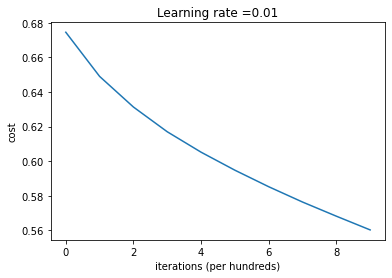

In [67]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

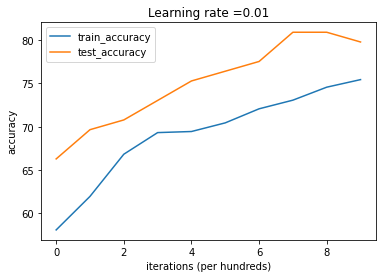

In [68]:
# Plot learning curve
train_accuracy = np.squeeze(d['train_accuracy'])
plt.plot(train_accuracy,label = "train_accuracy")
test_accuracy = np.squeeze(d['test_accuracy'])
plt.plot(test_accuracy,label = "test_accuracy")
plt.ylabel('accuracy')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend()
plt.show()

In [69]:
test_a ,_ = forward_propagation(test_x, d["parameters"])
test_y = np.where(test_a <0.5,0,1)

In [70]:

with open('submission.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(('PassengerId','Survived'))
    for i in range(0,test_y.shape[1]):
        spamwriter.writerow((str(892+i),str(test_y[0,i])))
   